In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [13]:
menu_df = pd.read_csv("menu.csv")

values_to_drop = ["Breakfast", "Coffee & Tea", "Smoothies & Shakes", "Beverages", "Snacks & Sides", "Desserts"]
menu_df = menu_df[~menu_df["Category"].isin(values_to_drop)]

columns_to_remove = ["Serving Size", "Calories from Fat", "Total Fat (% Daily Value)", "Saturated Fat", "Saturated Fat (% Daily Value)", "Trans Fat", "Cholesterol (% Daily Value)", "Sodium (% Daily Value)", "Carbohydrates (% Daily Value)", "Dietary Fiber", "Dietary Fiber (% Daily Value)", "Sugars", "Protein", "Vitamin A (% Daily Value)", "Vitamin C (% Daily Value)", "Calcium (% Daily Value)", "Iron (% Daily Value)"]
menu_df = menu_df.drop(columns=columns_to_remove)
menu_df["Restaurant"] = "McDonald\'s"

burger_menu_df = pd.read_csv("burger-king-menu.csv")

values_to_drop = ["Breakfast"]
burger_menu_df = burger_menu_df[~burger_menu_df["Category"].isin(values_to_drop)]

columns_to_remove = ["Fat Calories", "Saturated Fat (g)", "Trans Fat (g)", "Weight Watchers", "Protein (g)", "Sugars (g)", "Dietary Fiber (g)"]
burger_menu_df = burger_menu_df.drop(columns=columns_to_remove)
burger_menu_df["Restaurant"] = "Burger King"
burger_menu_df = burger_menu_df.rename(columns={"Fat (g)": "Total Fat", "Cholesterol (mg)": "Cholesterol", "Total Carb (g)": "Carbohydrates", "Sodium (mg)": "Sodium"})

combined_menu_df = pd.concat([menu_df, burger_menu_df], ignore_index=True)

print(combined_menu_df.head(100))

       Category                                       Item  Calories  \
0   Beef & Pork                                    Big Mac     530.0   
1   Beef & Pork                Quarter Pounder with Cheese     520.0   
2   Beef & Pork        Quarter Pounder with Bacon & Cheese     600.0   
3   Beef & Pork  Quarter Pounder with Bacon Habanero Ranch     610.0   
4   Beef & Pork                     Quarter Pounder Deluxe     540.0   
..          ...                                        ...       ...   
87      Chicken                          BIG FISH Sandwich     510.0   
88      Burgers                       Chicken Nuggets- 4pc     170.0   
89      Burgers                       Chicken Nuggets- 6pc     260.0   
90      Burgers                                  Hamburger     240.0   
91      Burgers                               Cheeseburger     280.0   

    Total Fat  Cholesterol  Sodium  Carbohydrates   Restaurant  
0        27.0         85.0   960.0           47.0   McDonald's  
1    

          Category                                  Item  Calories  Total Fat  \
40  Chicken & Fish          Chicken McNuggets (40 piece)    1880.0      118.0   
54         Burgers  Triple Whopper® Sandwich with Cheese    1220.0       82.0   
57         Burgers           Cheddar Bacon King Sandwich    1190.0       84.0   
56         Burgers                   Bacon King Sandwich    1150.0       79.0   
53         Burgers              Triple Whopper® Sandwich    1130.0       75.0   
61         Burgers                   Double Stacker King    1050.0       68.0   
84         Chicken          Spicy Chicken Nuggets- 20 pc    1050.0       74.0   
52         Burgers  Double Whopper® Sandwich with Cheese     980.0       64.0   
39  Chicken & Fish          Chicken McNuggets (20 piece)     940.0       59.0   
59         Burgers    Double Quarter Pound King Sandwich     900.0       54.0   

    Cholesterol  Sodium  Carbohydrates   Restaurant  
40        265.0  3600.0          118.0   McDonald's  


Text(0.5, 1.0, 'Food Items with Most Calories')

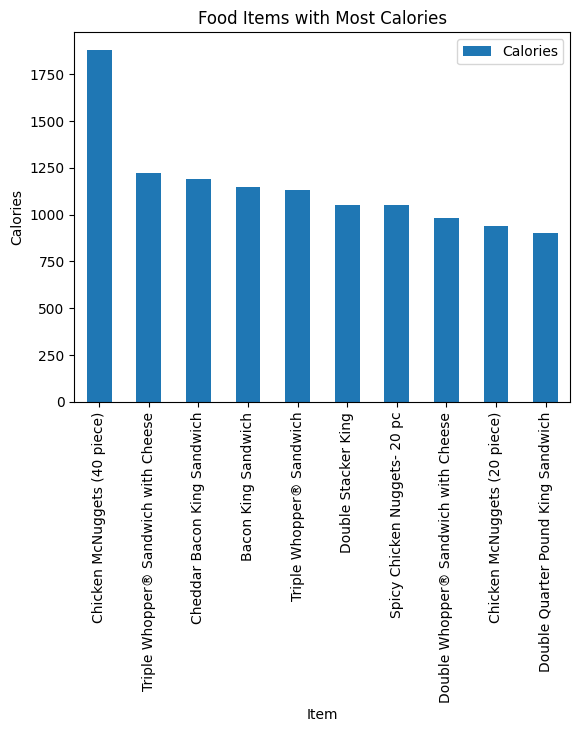

In [43]:
highest_10 = combined_menu_df.sort_values(by="Calories", ascending=False).head(10)
print(highest_10)

highest_10.plot(kind = "bar", x = "Item", y = "Calories")

plt.xlabel("Item")
plt.ylabel("Calories")
plt.title("Food Items with Most Calories")


          Category                                            Item  Calories  \
45          Salads       Premium Southwest Salad (without Chicken)     140.0   
42          Salads     Premium Bacon Ranch Salad (without Chicken)     140.0   
88         Burgers                            Chicken Nuggets- 4pc     170.0   
86         Chicken                                     Crispy Taco     170.0   
77         Chicken                            Chicken Nuggets- 4pc     170.0   
36  Chicken & Fish                     Chicken McNuggets (4 piece)     190.0   
81         Chicken                      Spicy Chicken Nuggets- 4pc     210.0   
44          Salads  Premium Bacon Ranch Salad with Grilled Chicken     220.0   
6      Beef & Pork                                       Hamburger     240.0   
63         Burgers                                       Hamburger     240.0   

    Total Fat  Cholesterol  Sodium  Carbohydrates   Restaurant  
45        4.5         10.0   150.0           20.0   Mc

Text(0.5, 1.0, 'Food Items with Least Calories')

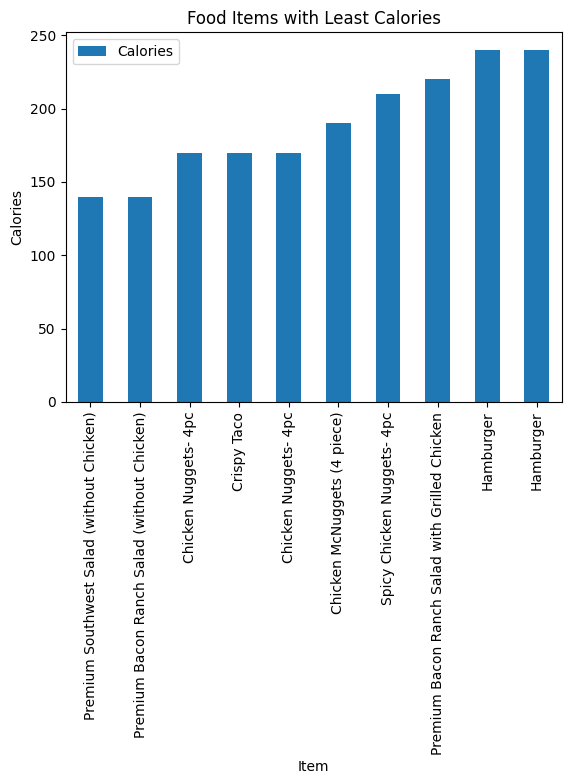

In [44]:
lowest_10 = combined_menu_df.sort_values(by="Calories", ascending=True).head(10)
print(lowest_10)

lowest_10.plot(kind = "bar", x = "Item", y = "Calories")

plt.xlabel("Item")
plt.ylabel("Calories")
plt.title("Food Items with Least Calories")

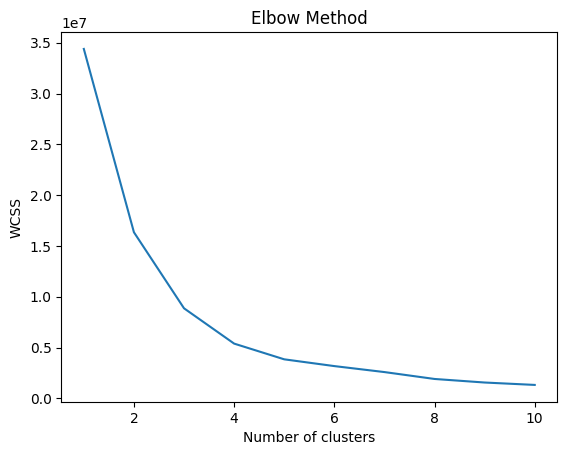

In [24]:
new_combined_menu_df = combined_menu_df.drop(columns=["Restaurant", "Category", "Item"])

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(new_combined_menu_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
k = 4

cluster_model = KMeans(n_clusters=k)
cluster_model.fit(new_combined_menu_df)

KMeans(n_clusters=4)

In [30]:
cluster_model.cluster_centers_.shape

(4, 5)

In [31]:
cluster_assigned_df = pd.DataFrame(cluster_model.predict(new_combined_menu_df), columns = ["cluster_id"])
cluster_assigned_df.index = new_combined_menu_df.index
cluster_assigned_df

,cluster_id
0,1
1,1
2,2
3,1
4,1
...,...
87,1
88,3
89,3
90,3


In [32]:
cluster_assigned_df["cluster_id"].value_counts()

cluster_id
1    39
2    27
3    23
0     3
Name: count, dtype: int64

In [41]:
for i in range(4):
    this_cluster = cluster_assigned_df[cluster_assigned_df["cluster_id"] == i]
    print("Cluster", i, "Size", this_cluster.shape[0])
    item_average = pd.DataFrame(new_combined_menu_df.loc[this_cluster.index].mean(axis = 0), columns = ["average"])
    display(item_average.head(5))

Cluster 0 Size 3


,average
Calories,1360.000000
Total Fat,90.333333
Cholesterol,205.000000
Sodium,2863.333333
Carbohydrates,74.333333


Cluster 1 Size 39


,average
Calories,487.435897
Total Fat,25.358974
Cholesterol,67.948718
Sodium,1001.794872
Carbohydrates,41.128205


Cluster 2 Size 27


,average
Calories,770.370370
Total Fat,45.074074
Cholesterol,128.703704
Sodium,1500.370370
Carbohydrates,51.814815


Cluster 3 Size 23


,average
Calories,253.478261
Total Fat,12.717391
Cholesterol,40.434783
Sodium,477.826087
Carbohydrates,21.608696


In [39]:
for cluster, item in cluster_assigned_df.groupby("cluster_id"):
    print("Cluster:", cluster, "Size:", item.shape[0])
    n = 5
    if (len(item) < 5):
        n = len(item)

    print(item.sample)
    for a_id in item.sample(n).index:
        print("\t", a_id, combined_menu_df["Restaurant"][a_id] + " " + combined_menu_df["Item"][a_id])

Cluster: 0 Size: 3
	 40 McDonald's Chicken McNuggets (40 piece)
	 84 Burger King Spicy Chicken Nuggets- 20 pc
	 56 Burger King Bacon King Sandwich
Cluster: 1 Size: 39
	 51 Burger King Double Whopper® Sandwich
	 1 McDonald's Quarter Pounder with Cheese
	 76 Burger King Spicy Crispy Chicken Jr.
	 18 McDonald's Premium Grilled Chicken Club Sandwich
	 85 Burger King Chicken Fries – 9 pc.
Cluster: 2 Size: 27
	 21 McDonald's Bacon Clubhouse Crispy Chicken Sandwich
	 74 Burger King BBQ Bacon Crispy Chicken Sandwich
	 80 Burger King Chicken Nuggets- 20pc
	 22 McDonald's Bacon Clubhouse Grilled Chicken Sandwich
	 2 McDonald's Quarter Pounder with Bacon & Cheese
Cluster: 3 Size: 23
	 45 McDonald's Premium Southwest Salad (without Chicken)
	 65 Burger King Double Hamburger
	 88 Burger King Chicken Nuggets- 4pc
	 81 Burger King Spicy Chicken Nuggets- 4pc
	 42 McDonald's Premium Bacon Ranch Salad (without Chicken)
